# Correlated Topic Model
To create the topic network that exhibit the relationships between topics (multinomial distribution of terms)

To create the CTM, we use the ctm-c implementation from blei-lab: https://github.com/blei-lab/ctm-c

## Create the mapping for each document
As the ctm-c requires the documents to be represented in a sparse vector format:

[M] [term_1]:[count_1] [term_2]:[count_2] ...  [term_N]:[count_3]

* [M] is the number of unique terms in the document

* [term_i] is an integer associated with the i-th term in the
  vocabulary.

* [count_i] is how many times the i-th term appeared in the document.

In [2]:
import pandas as pd
import pickle as pkl
from gensim.corpora import Dictionary
from gensim.corpora import BleiCorpus

In [2]:
dictionary = Dictionary.load('../data/fullpub/dictionary_fullpub.pkl')

In [3]:
corpus = pkl.load(open('../data/fullpub/corpus_fullpub.pkl','rb'))

In [5]:
BleiCorpus.serialize('../data/fullpub/bleicorpus.txt', corpus, id2word=dictionary)

In [6]:
df = pd.read_pickle('../data/fullpub/pub_toks_wBOW_fullpub.pkl')

In [7]:
df.head(1)

,year,title,abstract,publications,summary,summary_toks,bigram_toks,trigram_toks,combined_toks,bow
pub_id,,,,,,,,,,
400818dc-63af-4a26-80c5-906f98e1f8ab,1989,ballooning stability analysis of jet hmode dis...,previous studies of the stability of a large a...,proceedings 16th european conference on contr...,ballooning stability analysis of jet hmode dis...,"[ballooning, stability, analysis, jet, hmode, ...",[european_conference],[],"[ballooning, stability, analysis, jet, hmode, ...","[(0, 3), (1, 1), (2, 1), (3, 1), (4, 2), (5, 2..."


In [11]:
combined_toks = list(df.combined_toks)

In [15]:
with open('../data/fullpub/combined_toks.txt', 'w') as f:
    for pub in combined_toks:
        if len(pub):
            out = " ".join(pub)
            f.write(out + "\n")
        else:
            pass

In [14]:
df.drop(
    labels=[
        'year', 'title', 'abstract', 'publications', 'summary', 'summary_toks',
        'bigram_toks', 'trigram_toks', 'combined_toks'
    ],
    axis=1,
    inplace=True)

In [32]:
bow = sorted(pub[1].bow)
print(bow)

[(2, 1), (3, 1), (7, 3), (39, 1), (70, 7), (73, 3), (74, 2), (127, 1), (145, 1), (147, 1), (168, 1), (186, 1), (190, 1), (222, 1), (289, 1), (304, 1), (306, 1), (365, 1), (366, 1), (432, 1), (436, 1), (442, 1), (446, 1), (459, 2), (462, 2), (518, 1), (568, 1), (723, 1), (753, 2), (817, 1), (822, 1), (874, 1), (898, 1), (939, 1), (953, 1), (955, 1), (998, 1), (1007, 2), (1028, 1), (1202, 2), (1204, 5), (1244, 1), (1246, 2), (1249, 6), (1253, 1), (1270, 1), (1381, 3), (1406, 1), (1432, 1), (1435, 1), (1452, 1), (1618, 1), (1756, 2), (2251, 1), (2295, 2), (2329, 1), (2342, 1), (2390, 3), (2429, 1), (2568, 1), (2881, 1), (2950, 2), (3002, 1), (3155, 1), (3185, 1), (3408, 1), (4140, 1), (4143, 1), (4145, 1), (4153, 1), (4400, 1), (4406, 1), (4702, 3), (5884, 1), (5885, 3)]


In [52]:
with open('../data/fullpub/doc_to_sparse.txt', 'w') as f:
    for pub in df.iterrows():
        output = ""
        bow = sorted(pub[1].bow)
        output += str(len(bow)) + " "
        bow = dict(bow)  # convert to BOW for quick dictionary access
        toks_id = list(bow.keys())
        i = 0
        while i < num_terms:
            if i in toks_id:
                output += str(i) + ":" + str(bow[i]) + " "
            else:
                output += str(i) + ":0 "
            i += 1
        f.write(output + "\n")

# Visualising LDA tuning

In [31]:
from rpy2.robjects import r
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [23]:
import numpy as np

In [29]:
%%R
# Load R object:
load('../src/res/tuning.topic_number.rdata')
# Convert the topic_number in tm to 

In [38]:
df_topic_number = robjects.r['topic_number']
df_topic_number.set_index('topics', inplace=True)

In [135]:
# Scale to (0,1)
df_topic_number_norm2 = df_topic_number.apply(
    lambda col: (col - min(col)) / (max(col)-min(col)),
    axis=0,
)

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

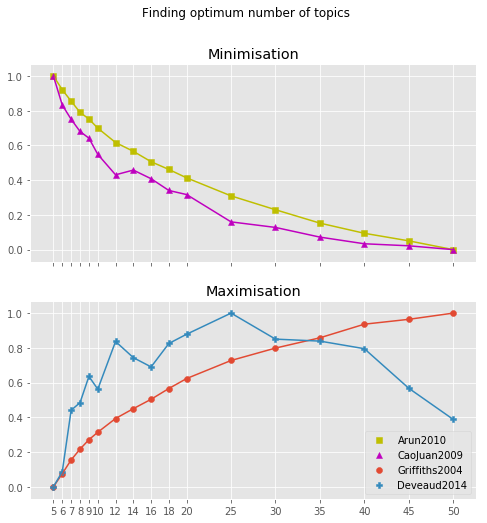

In [183]:
x = df_topic_number_norm.index

fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(8, 8))
ax1.plot(x, df_topic_number_norm["Arun2010"], c='y')
arun = ax1.scatter(x, df_topic_number_norm["Arun2010"], marker='s', c='y')
ax1.plot(x, df_topic_number_norm['CaoJuan2009'], c='m')
caojuan = ax1.scatter(x, df_topic_number_norm['CaoJuan2009'], marker='^', c='m')

# ax2 = plt.subplot(212)
ax2.plot(x, df_topic_number_norm['Griffiths2004'])
griffiths = ax2.scatter(
    x,
    df_topic_number_norm['Griffiths2004'],
    marker='o',
)
ax2.plot(x, df_topic_number_norm['Deveaud2014'])
deveaud = ax2.scatter(x, df_topic_number_norm['Deveaud2014'], marker='P')

fig.suptitle('Finding optimum number of topics')
ax2.set_xticks(x)
ax1.set_title('Minimisation')
ax2.set_title('Maximisation')
plt.legend(
    (arun, caojuan, griffiths, deveaud),
    ('Arun2010', 'CaoJuan2009', 'Griffiths2004', 'Deveaud2014'),
    loc=0)
